In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from matplotlib import pyplot as plt

In [ ]:
df = web.DataReader('TATAMOTORS.NS', data_source='yahoo', start='2012-01-01', end='2021-01-31')

In [ ]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,183.086212,176.902542,179.029724,181.997894,10175802.0,176.739136
2012-01-03,192.732742,184.224014,184.273483,191.891769,15868503.0,186.347137
2012-01-04,200.351028,190.951843,191.792831,199.064835,22752471.0,193.312927
2012-01-05,203.566544,198.075439,198.817490,199.955276,21640778.0,194.177643
2012-01-06,202.824509,196.393478,197.877563,201.439362,13553191.0,195.618851
...,...,...,...,...,...,...
2021-01-25,299.500000,277.350006,296.899994,279.149994,164346913.0,279.149994
2021-01-27,275.000000,265.700012,274.899994,267.500000,126586833.0,267.500000
2021-01-28,273.399994,259.049988,260.049988,266.799988,129156876.0,266.799988


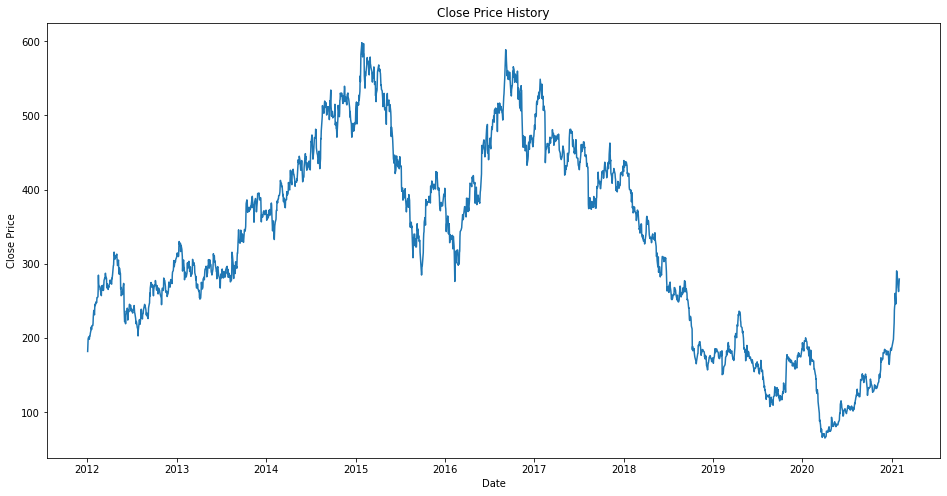

In [ ]:
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [ ]:
data = df.filter(['Close'])

In [ ]:
dataset = data.values

In [ ]:
training_data_len = math.ceil(len(dataset)* 0.8)

In [ ]:
training_data_len

1789

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
scaled_data

array([[0.21901343],
       [0.23758182],
       [0.25104391],
       ...,
       [0.37816625],
       [0.3704716 ],
       [0.40218876]])

In [ ]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.21901343, 0.23758182, 0.25104391, 0.25271505, 0.25550032,
       0.24992979, 0.25828558, 0.25791422, 0.26032809, 0.26515589,
       0.27434723, 0.2811247 , 0.27453291, 0.28307439, 0.28428133,
       0.28428133, 0.28957333, 0.30628487, 0.32281075, 0.31176256,
       0.33005242, 0.33868671, 0.33506587, 0.33729409, 0.34490713,
       0.34230755, 0.34277175, 0.35521259, 0.35530543, 0.35706941,
       0.37498794, 0.41193903, 0.38974981, 0.38612894, 0.38120836,
       0.37591635, 0.37591635, 0.37034582, 0.36013323, 0.38501485,
       0.38055847, 0.37359532, 0.37443089, 0.38650031, 0.3732239 ,
       0.37498794, 0.39856978, 0.40516157, 0.40293338, 0.4159312 ,
       0.41676683, 0.40980368, 0.40376895, 0.38139404, 0.39012117,
       0.37898011, 0.38380791, 0.37582351, 0.3839936 , 0.38092984])]
[0.3824152949176307]

[array([0.21901343, 0.23758182, 0.25104391, 0.25271505, 0.25550032,
       0.24992979, 0.25828558, 0.25791422, 0.26032809, 0.26515589,
       0.27434723, 0.2811247 , 0.274

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
x_train.shape

(1729, 60, 1)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(keras.layers.LSTM(50, return_sequences=True))
model.add(keras.layers.LSTM(50, return_sequences=False))
model.add(keras.layers.Dense(25))
model.add(keras.layers.Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=50, verbose=1)

Epoch 1/50
55/55 [==============================] - 7s 41ms/step - loss: 0.0650
Epoch 2/50
55/55 [==============================] - 2s 41ms/step - loss: 0.0021
Epoch 3/50
55/55 [==============================] - 2s 41ms/step - loss: 0.0019
Epoch 4/50
55/55 [==============================] - 2s 41ms/step - loss: 0.0022
Epoch 5/50
55/55 [==============================] - 2s 41ms/step - loss: 0.0017
Epoch 6/50
55/55 [==============================] - 2s 41ms/step - loss: 0.0017
Epoch 7/50
55/55 [==============================] - 2s 41ms/step - loss: 0.0021
Epoch 8/50
55/55 [==============================] - 2s 41ms/step - loss: 0.0014
Epoch 9/50
55/55 [==============================] - 2s 41ms/step - loss: 0.0014
Epoch 10/50
55/55 [==============================] - 2s 41ms/step - loss: 0.0012
Epoch 11/50
55/55 [==============================] - 2s 41ms/step - loss: 0.0018
Epoch 12/50
55/55 [==============================] - 2s 41ms/step - loss: 0.0011
Epoch 13/50
55/55 [==================

In [ ]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])



In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions  = model.predict(x_test)

In [ ]:
predictions = scaler.inverse_transform(predictions)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(predictions, y_test)

In [ ]:
r2

0.9565330162039305

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


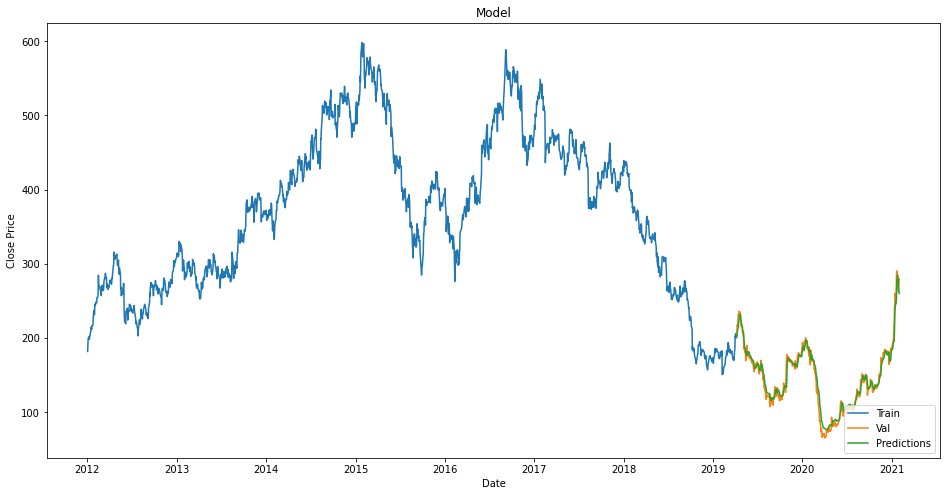

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

In [ ]:
valid

,Close,Predictions
Date,,
2019-04-09,205.899994,202.639053
2019-04-10,216.050003,202.631119
2019-04-11,218.199997,206.989258
2019-04-12,215.949997,211.917999
2019-04-15,231.750000,214.054565
...,...,...
2021-01-25,279.149994,284.771515
2021-01-27,267.500000,280.611877
2021-01-28,266.799988,269.971680


In [ ]:
test = web.DataReader('TATAMOTORS.NS', data_source='yahoo', start='2020-11-01', end='2021-02-02')
test_data = test.filter(['Close'])
actual_price = test_data[-1:]
test_data = test_data[-61:-1].values
test_data = scaler.transform(test_data)

In [ ]:
X_test = []
X_test.append(test_data)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
pred_price

array([[267.98016]], dtype=float32)

In [ ]:
actual_price

,Close
Date,
2021-02-02,313.850006


In [ ]:
test

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-02,134.000000,131.100006,133.649994,132.850006,40388690.0,132.850006
2020-11-03,137.399994,133.550003,135.000000,134.100006,52071476.0,134.100006
2020-11-04,137.000000,134.000000,135.600006,135.899994,44675934.0,135.899994
2020-11-05,138.000000,136.000000,137.000000,137.649994,38928602.0,137.649994
2020-11-06,142.300003,137.649994,137.649994,139.000000,67966815.0,139.000000
...,...,...,...,...,...,...
2021-01-27,275.000000,265.700012,274.899994,267.500000,126586833.0,267.500000
2021-01-28,273.399994,259.049988,260.049988,266.799988,129156876.0,266.799988
2021-01-29,278.799988,260.600006,273.000000,262.700012,138442348.0,262.700012
